# Question 1
Calculation of heat flux into the soil using numerical differentiation

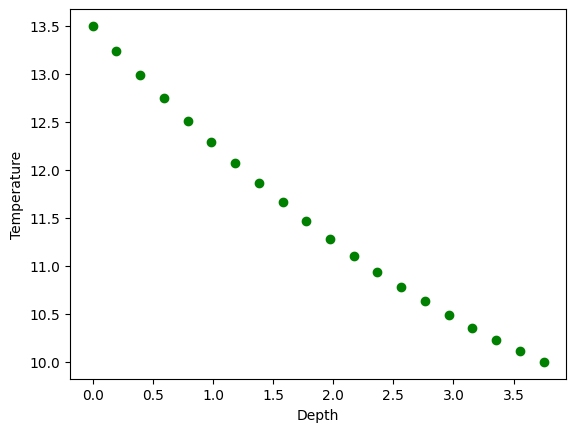

The heat flux into the ground at z = 0 is : 0.7055994355057748


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Given Data
Z=[0,1.25,3.75]
T=[13.5,12,10]

#Interpolating Data
def Lagrange(Z0):
    Sum=0.0
    for i in range(len(Z)):
        product=1.0
        for j in range(len(Z)):
            if i!=j:
                product*=(Z0-Z[j])/(Z[i]-Z[j])
        Sum+=product*T[i]
    return Sum
    
Z_value=np.linspace(Z[0],Z[-1],20)
T_value=Lagrange(Z_value)

plt.plot(Z_value,T_value,'go')
plt.ylabel('Temperature')
plt.xlabel('Depth')
plt.show()

#Numerical Differentiation
h=0.00001
def forward_diff(Lagrange,Z):
    return (Lagrange(Z+h)-Lagrange(Z))/h
    
#Parameters
k=3.5*10**(-7)       #coefficient of thermal diffusivity in m**2/s
p=1800               #soil density in kg/m**3
C=840                #specific heat of soil in J/kg-celcius

q=-k*p*C*forward_diff(Lagrange,0)
print('The heat flux into the ground at z = 0 is :',q)

# Question 2
Solution of drag equation by Euler's Method

Enter initial time :  0
Enter initial velocity :  0
Enter final time :  5


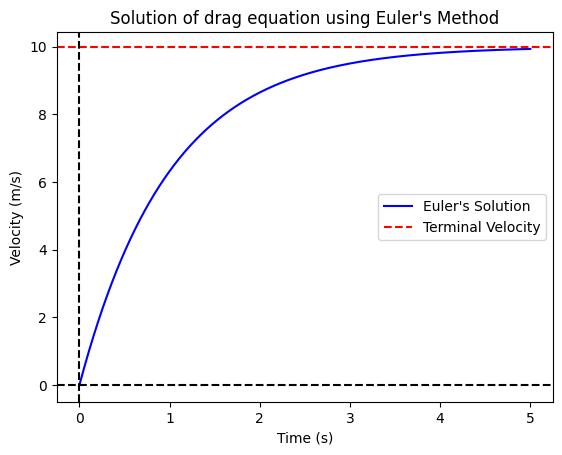

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def fun(t,v):
    return 10-1.0*v                    #dv/dt=a-bv
    
t0=eval(input('Enter initial time : '))
v0=eval(input('Enter initial velocity : '))
tn=eval(input('Enter final time : '))

h=0.0001                                   
def euler(fun,t0,v0,tn,h):
    T=np.arange(t0,tn+h,h)  
    V=np.zeros(len(T))  
    V[0]=v0
    for i in range(len(T)-1):
        t,v=T[i],V[i]
        V[i+1]=v+h*fun(t,v)  
    return T,V
    
t_values,v_values=euler(fun,t0,v0,tn,h)
plt.plot(t_values,v_values,'b-',label="Euler's Solution")
plt.axhline(10,color='r',linestyle='--',label='Terminal Velocity')
plt.axhline(0,color='black',linestyle='--')
plt.axvline(0,color='black',linestyle='--')
plt.title("Solution of drag equation using Euler's Method")
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()
plt.show()

# Question 3
Solution of Coupled Radioactive Decay using Euler's Method

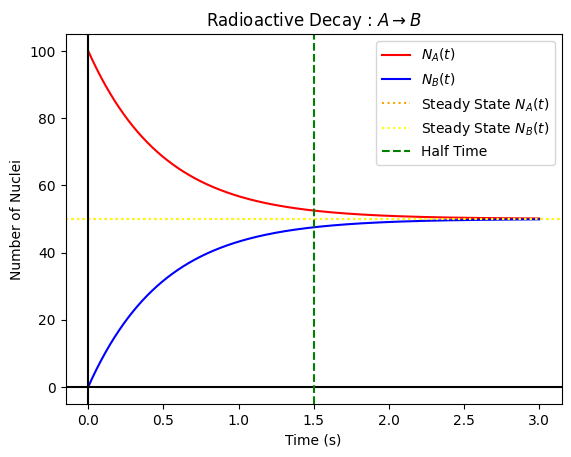

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def dNA(NA,NB):
    return (-NA+NB)/1.0            #dNA/dt=-NA/tau+NB/tau

def dNB(NA,NB):
    return (NA-NB)/1.0             #dNB/dt=NA/tau-NB/tau

NA0=100                            #Initial number of A nuclei
NB0=0                              #Initial number of B nuclei
t0=0                               #Initial time
tn=3                               #Finaltime
h=0.00001 

def euler_system(dNA,dNB,NA0,NB0,t0,tn):
    T=np.arange(t0,tn+h,h)
    NA=np.zeros(len(T))
    NB=np.zeros(len(T))
    NA[0]=NA0
    NB[0]=NB0
    for i in range(len(T)-1):
        NA[i+1]=NA[i]+h*dNA(NA[i],NB[i])
        NB[i+1]=NB[i]+h*dNB(NA[i],NB[i])
    return T,NA,NB
    
T,NA,NB=euler_system(dNA,dNB,NA0,NB0,t0,tn)

plt.plot(T,NA,'r-',label='$N_A(t)$')
plt.plot(T,NB,'b-',label='$N_B(t)$')
plt.axhline(NA[-1],color='orange',linestyle=':',label=r'Steady State $N_A(t)$')
plt.axhline(NB[-1],color='yellow',linestyle=':',label=r'Steady State $ N_B(t)$')
plt.axvline(0,color='black')
plt.axhline(0,color='black')
plt.axvline(tn/2,color='green',linestyle='--',label='Half Time')
plt.title(r'Radioactive Decay : $A \rightarrow B$',fontsize=12)
plt.xlabel('Time (s)')
plt.ylabel('Number of Nuclei')
plt.legend()
plt.show()

# Question 3 (Vectorization)
Solution of Coupled Radioactive Decay using Euler's Method

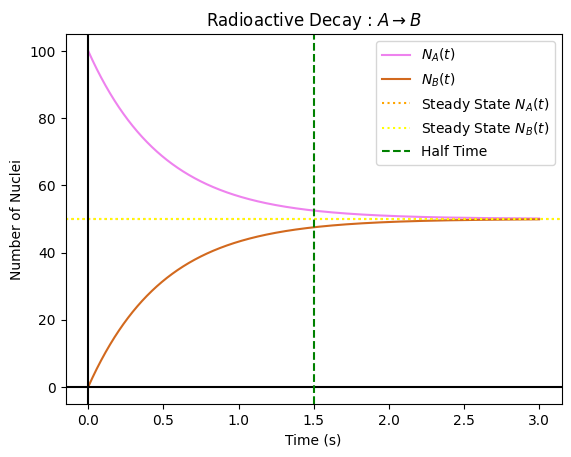

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def dNA(NA,NB):
    return (-NA+NB)/1.0

def dNB(NA,NB):
    return (NA-NB)/1.0

NA0,NB0,t0,tn,h=100,0,0,3,0.00001

def euler_system(dNA,dNB,NA0,NB0,t0,tn,h):
    T=np.arange(t0,tn+h,h)
    R=np.zeros((len(T),2))
    R[0,0],R[0,1]=NA0,NB0
    for i in range(len(T)-1):
        R[i+1]=R[i]+h*np.array([dNA(R[i,0],R[i,1]),dNB(R[i,0],R[i,1])])
    return T,R[:,0],R[:,1]

T,NA,NB=euler_system(dNA,dNB,NA0,NB0,t0,tn,h)

plt.plot(T,NA,color='violet',linestyle='-',label='$N_A(t)$')
plt.plot(T,NB,color='chocolate',linestyle='-',label='$N_B(t)$')
plt.axhline(NA[-1],color='orange',linestyle=':',label=r'Steady State $N_A(t)$')
plt.axhline(NB[-1],color='yellow',linestyle=':',label=r'Steady State $N_B(t)$')
plt.axvline(0,color='black')
plt.axhline(0,color='black')
plt.axvline(tn/2,color='green',linestyle='--',label='Half Time')
plt.title(r'Radioactive Decay : $A \rightarrow B$',fontsize=12)
plt.xlabel('Time (s)')
plt.ylabel('Number of Nuclei')
plt.legend()
plt.show()

# Question 4
Solution to Lorentz Equations

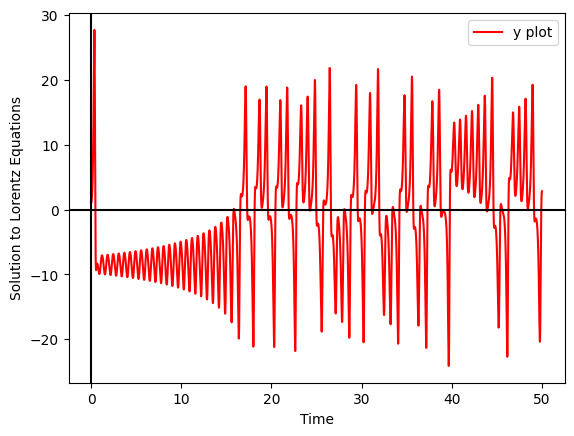

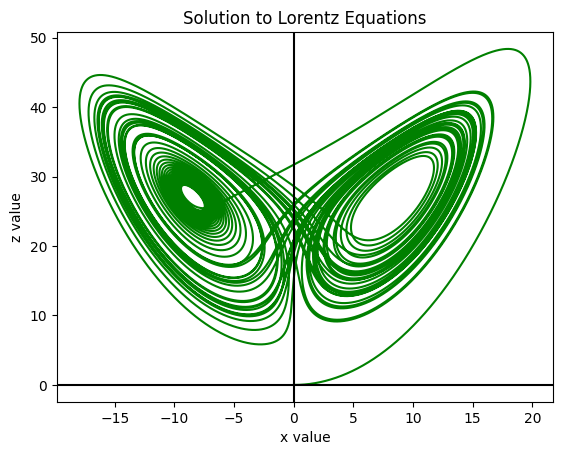

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def fx(t,x,y,z):
    return sig*(y-x) 

def fy(t,x,y,z):
    return r*x-y-x*z

def fz(t,x,y,z):
    return x*y-b*z

functions=[fx,fy,fz]

h=0.0001
def RK_4(func,t0,u0,tn,h):
    T=np.arange(t0,tn+h,h)
    R=np.zeros((len(T),len(u0)))
    R[0]=u0
    for i in range(len(T)-1):
        t,u=T[i],R[i]
        k1=h*np.array([f(t,*u) for f in func])
        k2=h*np.array([f(t+h/2,*u+k1/2) for f in func])
        k3=h*np.array([f(t+h/2,*u+k2/2) for f in func])
        k4=h*np.array([f(t+h,*u+k3) for f in func])
        R[i+1]=u+(k1+2*k2+2*k3+k4)/6
    return T,R[:,0],R[:,1],R[:,2]

sig,r,b=10,28,8/3         #Given choice of parameters
t0,x0,y0,z0=0,0,1,0       #Initial conditions
tn=50

T,X,Y,Z=RK_4(functions,t0,[x0,y0,z0],tn,h)

plt.figure()
plt.plot(T,Y,'r-',label='y plot')
plt.ylabel('Solution to Lorentz Equations')
plt.xlabel('Time')
plt.axhline(color='black')
plt.axvline(color='black')
plt.legend()

plt.figure()
plt.plot(X,Z,'g-')
plt.title('Solution to Lorentz Equations')
plt.ylabel('z value')
plt.xlabel('x value')
plt.axhline(color='black')
plt.axvline(color='black')
plt.show()